In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import pandas as pd

In [3]:
#data = pd.read_csv('/content/drive/My Drive/solar-forecasting/data/meteo_galicia.csv', sep=';', parse_dates=['fecha'], decimal=',',
#                 infer_datetime_format=True, low_memory=False, index_col='fecha').sort_index()

In [4]:
data = pd.read_csv('./data/meteo_galicia.csv', sep=';', parse_dates=['fecha'], decimal=',',
                 infer_datetime_format=True, low_memory=False, index_col='fecha').sort_index()

In [5]:
data

,estacionid,lat,lon,tamb,hum,pres,prec,rad,vvien,tipodered
fecha,,,,,,,,,,
2019-01-01 00:10:00,20284,42.4044,-8.6730,5.4,0,1022.0,0.0,0.0,0.7,OFICIAL
2019-01-01 00:10:00,20233,42.3554,-7.0086,7.3,0,892.1,0.0,0.0,3.5,OFICIAL
2019-01-01 00:10:00,20218,43.1626,-7.2826,9.2,0,955.0,0.0,0.0,0.0,OFICIAL
2019-01-01 00:10:00,20217,42.7071,-7.0471,8.5,0,882.5,0.0,1.0,6.3,OFICIAL
2019-01-01 00:10:00,20221,43.5407,-7.0830,5.3,0,1027.0,0.0,0.0,2.8,OFICIAL
...,...,...,...,...,...,...,...,...,...,...
2019-06-01 19:40:00,20249,42.2987,-7.5907,25.0,0,909.0,0.0,402.0,2.0,OFICIAL
2019-06-01 19:40:00,20259,42.1630,-7.0896,27.0,0,922.0,0.0,374.0,3.0,OFICIAL
2019-06-01 19:40:00,20255,42.4631,-6.9295,30.0,0,NaN,0.0,378.0,0.0,OFICIAL


In [6]:
data = data.drop(columns=['tipodered', 'hum', 'prec', 'vvien', 'pres'])

In [7]:
len(data)

2510008

In [8]:
data.isnull().sum()

estacionid        0
lat               0
lon               0
tamb           2475
rad           10847
dtype: int64

In [9]:
data = data.dropna()

In [10]:
len(data)

2496903

In [11]:
data.isnull().sum()

estacionid    0
lat           0
lon           0
tamb          0
rad           0
dtype: int64

In [12]:
data

,estacionid,lat,lon,tamb,rad
fecha,,,,,
2019-01-01 00:10:00,20284,42.4044,-8.6730,5.4,0.0
2019-01-01 00:10:00,20233,42.3554,-7.0086,7.3,0.0
2019-01-01 00:10:00,20218,43.1626,-7.2826,9.2,0.0
2019-01-01 00:10:00,20217,42.7071,-7.0471,8.5,1.0
2019-01-01 00:10:00,20221,43.5407,-7.0830,5.3,0.0
...,...,...,...,...,...
2019-06-01 19:40:00,20249,42.2987,-7.5907,25.0,402.0
2019-06-01 19:40:00,20259,42.1630,-7.0896,27.0,374.0
2019-06-01 19:40:00,20255,42.4631,-6.9295,30.0,378.0


In [13]:
estaciones = [s for s in set(data['estacionid'])]

In [14]:
len(estaciones)

142

In [15]:
%%time
data_by_station = []

for s in estaciones:
    filter_station = data['estacionid'] == s
    data_station = data[filter_station].drop(columns=['estacionid'])
    d = data_station.describe()
    if d.rad['max'] != 0:
        data_by_station.append(data_station)

CPU times: user 2.59 s, sys: 403 µs, total: 2.6 s
Wall time: 2.67 s


In [16]:
len(data_by_station)

111

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': (16, 6)})

In [18]:
data_by_station[0]

,lat,lon,tamb,rad
fecha,,,,
2019-01-01 01:00:00,43.3634,-8.4419,11.6,0.0
2019-01-01 01:10:00,43.3634,-8.4419,10.9,0.0
2019-01-01 01:30:00,43.3634,-8.4419,10.3,0.0
2019-01-01 01:40:00,43.3634,-8.4419,10.0,0.0
2019-01-01 02:00:00,43.3634,-8.4419,10.2,0.0
...,...,...,...,...
2019-06-01 18:30:00,43.3634,-8.4419,27.0,578.0
2019-06-01 18:40:00,43.3634,-8.4419,26.0,544.0
2019-06-01 19:00:00,43.3634,-8.4419,26.0,471.0


In [19]:
%%time
data_by_station = [s.resample('1H').mean().ffill().bfill() for s in data_by_station]

CPU times: user 297 ms, sys: 2.93 ms, total: 300 ms
Wall time: 412 ms


In [20]:
data_by_station[0]

,lat,lon,tamb,rad
fecha,,,,
2019-01-01 01:00:00,43.3634,-8.4419,10.700,0.000000
2019-01-01 02:00:00,43.3634,-8.4419,10.350,0.000000
2019-01-01 03:00:00,43.3634,-8.4419,9.800,0.000000
2019-01-01 04:00:00,43.3634,-8.4419,11.125,0.000000
2019-01-01 05:00:00,43.3634,-8.4419,11.675,0.000000
...,...,...,...,...
2019-06-01 15:00:00,43.3634,-8.4419,22.750,851.000000
2019-06-01 16:00:00,43.3634,-8.4419,22.500,800.500000
2019-06-01 17:00:00,43.3634,-8.4419,24.750,693.750000


In [21]:
for d in data_by_station:
    d['day']=[x.day for x in d.index]
    d['month']=[x.month for x in d.index]
    d['hour']=[x.hour for x in d.index]

In [22]:
data_by_station[0]

,lat,lon,tamb,rad,day,month,hour
fecha,,,,,,,
2019-01-01 01:00:00,43.3634,-8.4419,10.700,0.000000,1,1,1
2019-01-01 02:00:00,43.3634,-8.4419,10.350,0.000000,1,1,2
2019-01-01 03:00:00,43.3634,-8.4419,9.800,0.000000,1,1,3
2019-01-01 04:00:00,43.3634,-8.4419,11.125,0.000000,1,1,4
2019-01-01 05:00:00,43.3634,-8.4419,11.675,0.000000,1,1,5
...,...,...,...,...,...,...,...
2019-06-01 15:00:00,43.3634,-8.4419,22.750,851.000000,1,6,15
2019-06-01 16:00:00,43.3634,-8.4419,22.500,800.500000,1,6,16
2019-06-01 17:00:00,43.3634,-8.4419,24.750,693.750000,1,6,17


In [23]:
import numpy as np
import tensorflow as tf

np.random.seed(1)
tf.random.set_seed(1)

In [24]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    
    return agg

def get_rnn_dataset(data, past_history=10, forecast_horizon=1):
    n_vars = data.shape[1]
    values = series_to_supervised(data, past_history, forecast_horizon).values
    train_X, train_y = values[:, :-1*n_vars*forecast_horizon], values[:, n_vars*past_history+2::n_vars]
    
    return train_X, train_y

In [25]:
past_history = 23
forecast_horizon = 1

In [26]:
%%time
data_by_station_series = [series_to_supervised(d, past_history, forecast_horizon) for d in data_by_station]

CPU times: user 2.82 s, sys: 158 ms, total: 2.98 s
Wall time: 3.06 s


In [27]:
data_by_station_series[0]

,var1(t-23),var2(t-23),var3(t-23),var4(t-23),var5(t-23),var6(t-23),var7(t-23),var1(t-22),var2(t-22),var3(t-22),...,var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
fecha,,,,,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00,43.3634,-8.4419,10.700,0.00,1.0,1.0,1.0,43.3634,-8.4419,10.350,...,1.0,1.0,23.0,43.3634,-8.4419,8.550,0.000000,2,1,0
2019-01-02 01:00:00,43.3634,-8.4419,10.350,0.00,1.0,1.0,2.0,43.3634,-8.4419,9.800,...,2.0,1.0,0.0,43.3634,-8.4419,7.775,0.000000,2,1,1
2019-01-02 02:00:00,43.3634,-8.4419,9.800,0.00,1.0,1.0,3.0,43.3634,-8.4419,11.125,...,2.0,1.0,1.0,43.3634,-8.4419,7.250,0.000000,2,1,2
2019-01-02 03:00:00,43.3634,-8.4419,11.125,0.00,1.0,1.0,4.0,43.3634,-8.4419,11.675,...,2.0,1.0,2.0,43.3634,-8.4419,7.050,0.000000,2,1,3
2019-01-02 04:00:00,43.3634,-8.4419,11.675,0.00,1.0,1.0,5.0,43.3634,-8.4419,11.750,...,2.0,1.0,3.0,43.3634,-8.4419,7.350,0.000000,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-01 15:00:00,43.3634,-8.4419,28.000,799.00,31.0,5.0,16.0,43.3634,-8.4419,28.000,...,1.0,6.0,14.0,43.3634,-8.4419,22.750,851.000000,1,6,15
2019-06-01 16:00:00,43.3634,-8.4419,28.000,688.75,31.0,5.0,17.0,43.3634,-8.4419,27.500,...,1.0,6.0,15.0,43.3634,-8.4419,22.500,800.500000,1,6,16
2019-06-01 17:00:00,43.3634,-8.4419,27.500,566.50,31.0,5.0,18.0,43.3634,-8.4419,26.000,...,1.0,6.0,16.0,43.3634,-8.4419,24.750,693.750000,1,6,17


In [28]:
in_vars = []

for i in range(past_history, 0, -1):
    for v in [1, 2, 3, 4, 5, 6, 7]:
        in_vars.append(('var%d(t-%d)' % (v,i)))


rad_var = []

for i in range(past_history, 0, -1):
    rad_var.append(('var4(t-%d)' % i))
        
day_var = []

for i in range(past_history, 0, -1):
    day_var.append(('var5(t-%d)' % i))
        
month_var = []

for i in range(past_history, 0, -1):
    month_var.append(('var6(t-%d)' % i))

target_var = []

for i in range(0, forecast_horizon):
    if i == 0:
        target_var.append('var4(t)')
    else:
        target_var.append(('var4(t+%d)' % i))

#### CONCAT

In [29]:
data_all = pd.concat(data_by_station_series)

data_all

,var1(t-23),var2(t-23),var3(t-23),var4(t-23),var5(t-23),var6(t-23),var7(t-23),var1(t-22),var2(t-22),var3(t-22),...,var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
fecha,,,,,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00,43.3634,-8.4419,10.700000,0.000000,1.0,1.0,1.0,43.3634,-8.4419,10.350000,...,1.0,1.0,23.0,43.3634,-8.4419,8.550000,0.000000,2,1,0
2019-01-02 01:00:00,43.3634,-8.4419,10.350000,0.000000,1.0,1.0,2.0,43.3634,-8.4419,9.800000,...,2.0,1.0,0.0,43.3634,-8.4419,7.775000,0.000000,2,1,1
2019-01-02 02:00:00,43.3634,-8.4419,9.800000,0.000000,1.0,1.0,3.0,43.3634,-8.4419,11.125000,...,2.0,1.0,1.0,43.3634,-8.4419,7.250000,0.000000,2,1,2
2019-01-02 03:00:00,43.3634,-8.4419,11.125000,0.000000,1.0,1.0,4.0,43.3634,-8.4419,11.675000,...,2.0,1.0,2.0,43.3634,-8.4419,7.050000,0.000000,2,1,3
2019-01-02 04:00:00,43.3634,-8.4419,11.675000,0.000000,1.0,1.0,5.0,43.3634,-8.4419,11.750000,...,2.0,1.0,3.0,43.3634,-8.4419,7.350000,0.000000,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-01 15:00:00,42.5801,-8.8047,27.000000,938.000000,31.0,5.0,16.0,42.5801,-8.8047,26.000000,...,1.0,6.0,14.0,42.5801,-8.8047,24.000000,993.333333,1,6,15
2019-06-01 16:00:00,42.5801,-8.8047,26.000000,790.166667,31.0,5.0,17.0,42.5801,-8.8047,26.166667,...,1.0,6.0,15.0,42.5801,-8.8047,24.500000,925.666667,1,6,16
2019-06-01 17:00:00,42.5801,-8.8047,26.166667,627.000000,31.0,5.0,18.0,42.5801,-8.8047,25.666667,...,1.0,6.0,16.0,42.5801,-8.8047,24.833333,804.666667,1,6,17


In [30]:
len(data_all)

401446

In [31]:
data_all.isnull().sum()

var1(t-23)    0
var2(t-23)    0
var3(t-23)    0
var4(t-23)    0
var5(t-23)    0
             ..
var3(t)       0
var4(t)       0
var5(t)       0
var6(t)       0
var7(t)       0
Length: 168, dtype: int64

In [32]:
data_input = data_all[in_vars]
data_input.columns

Index(['var1(t-23)', 'var2(t-23)', 'var3(t-23)', 'var4(t-23)', 'var5(t-23)',
       'var6(t-23)', 'var7(t-23)', 'var1(t-22)', 'var2(t-22)', 'var3(t-22)',
       ...
       'var5(t-2)', 'var6(t-2)', 'var7(t-2)', 'var1(t-1)', 'var2(t-1)',
       'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var7(t-1)'],
      dtype='object', length=161)

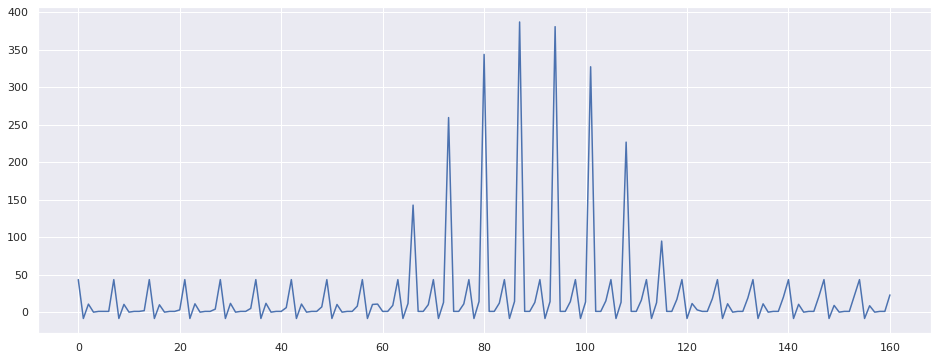

In [33]:
plt.plot(data_input.values[0])

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler(feature_range=(-1, 1))

CPU times: user 602 ms, sys: 236 ms, total: 839 ms
Wall time: 850 ms


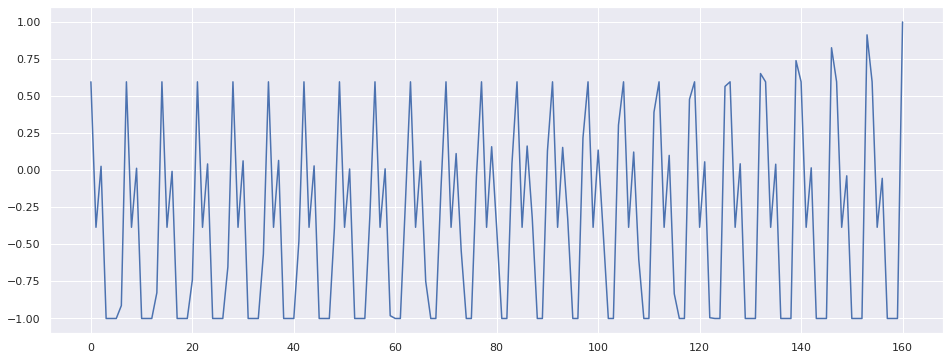

In [36]:
%%time
data_input = scaler.fit_transform(data_input.values)

plt.plot(data_input[0])

In [37]:
[i for i in range(0, 1100, 100)]

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [38]:
rad_range = ['{0}-{1}'.format(i, i+100) for i in range(0, 1100, 100)]

rad_range

['0-100',
 '100-200',
 '200-300',
 '300-400',
 '400-500',
 '500-600',
 '600-700',
 '700-800',
 '800-900',
 '900-1000',
 '1000-1100']

In [39]:
data_all[target_var].values

array([[  0.        ],
       [  0.        ],
       [  0.        ],
       ...,
       [804.66666667],
       [630.33333333],
       [456.2       ]])

In [40]:
def get_range_category(v):
    if v < 100:
        return 0
    if v < 200:
        return 1
    if v < 300:
        return 2
    if v < 400:
        return 3
    if v < 500:
        return 4
    if v < 600:
        return 5
    if v < 700:
        return 6
    if v < 800:
        return 7
    if v < 900:
        return 8
    if v < 1000:
        return 9
    if v >= 1000:
        return 10

labels = [get_range_category(x) for x in data_all[target_var].values]

In [41]:
from tensorflow.keras.utils import to_categorical

In [42]:
data_target = to_categorical(labels, 11)

In [43]:
data_input.shape

(401446, 161)

In [44]:
data_target.shape

(401446, 11)

### MODELO

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
%%time
X_train, X_test, y_train, y_test = train_test_split(data_input, data_target, train_size=0.8)

CPU times: user 722 ms, sys: 763 ms, total: 1.49 s
Wall time: 1.5 s


In [47]:
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Reshape, LSTM
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
earlyStopping = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)

In [49]:
model = Sequential([
    Reshape(input_shape=(X_train.shape[1], 1), target_shape=(X_train.shape[1], 1, 1)),
    Conv2D(64, kernel_size=(3,1), padding='same'),
    Flatten(),
    Dense(64, activation='tanh'),
    Dense(11, activation='softmax')
])

model.compile(loss=categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 161, 1, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 161, 1, 64)        256       
_________________________________________________________________
flatten (Flatten)            (None, 10304)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                659520    
_________________________________________________________________
dense_1 (Dense)              (None, 11)                715       
Total params: 660,491
Trainable params: 660,491
Non-trainable params: 0
_________________________________________________________________


In [50]:
%%time
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=256, callbacks=[earlyStopping], verbose=1)

Epoch 1/10
1004/1004 [==============================] - 73s 72ms/step - loss: 0.5210 - accuracy: 0.7996 - val_loss: 0.4442 - val_accuracy: 0.8198
Epoch 2/10
1004/1004 [==============================] - 72s 72ms/step - loss: 0.4323 - accuracy: 0.8294 - val_loss: 0.4185 - val_accuracy: 0.8328
Epoch 3/10
1004/1004 [==============================] - 72s 72ms/step - loss: 0.4167 - accuracy: 0.8360 - val_loss: 0.4038 - val_accuracy: 0.8403
Epoch 4/10
1004/1004 [==============================] - 67s 67ms/step - loss: 0.4090 - accuracy: 0.8390 - val_loss: 0.4004 - val_accuracy: 0.8421
Epoch 5/10
1004/1004 [==============================] - 70s 69ms/step - loss: 0.4015 - accuracy: 0.8414 - val_loss: 0.3939 - val_accuracy: 0.8420
Epoch 6/10
1004/1004 [==============================] - 72s 72ms/step - loss: 0.3986 - accuracy: 0.8425 - val_loss: 0.3873 - val_accuracy: 0.8465
Epoch 7/10
1004/1004 [==============================] - 65s 64ms/step - loss: 0.3942 - accuracy: 0.8435 - val_loss: 0.3842 -

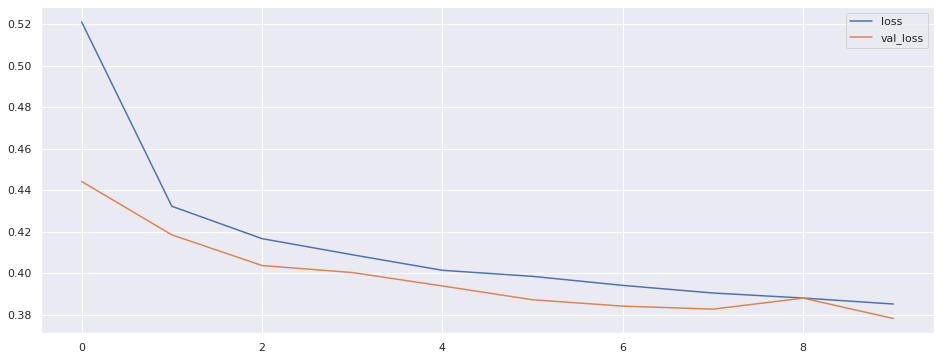

In [51]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [52]:
%%time
model.evaluate(X_test, y_test)

2510/2510 [==============================] - 40s 16ms/step - loss: 0.3798 - accuracy: 0.8497
CPU times: user 1min 20s, sys: 53.3 s, total: 2min 13s
Wall time: 40.3 s


[0.3798268735408783, 0.849719762802124]

In [53]:
%%time
y_predicted = model.predict(X_test)

CPU times: user 46.3 s, sys: 22.9 s, total: 1min 9s
Wall time: 19.7 s


In [54]:
YP = np.array([x.tolist().index(max(x)) for x in y_predicted])
YT = np.array([x.tolist().index(max(x)) for x in y_test])

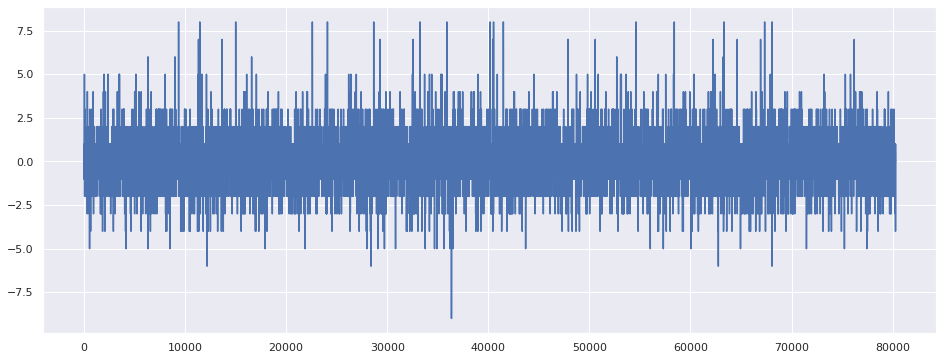

In [55]:
error = YT - YP
plt.plot(error)
plt.show()